In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score



# Load your DataFrame
df = pd.read_csv("/Users/dimuthshiharakarunarathna/Desktop/LinearRegresion/SriLanka_Weather_Dataset.csv", parse_dates=['time'])

# Create binary target: 1 if it rains tomorrow, else 0
df['RainTomorrow'] = df['rain_sum'].shift(-1) > 0
df['RainTomorrow'] = df['RainTomorrow'].astype(int)

# Drop the last row with missing 'RainTomorrow'
df.dropna(inplace=True)


In [11]:
features = [
    'weathercode',
    'temperature_2m_max',
    'temperature_2m_min',
    'temperature_2m_mean',
    'apparent_temperature_max',
    'apparent_temperature_min',
    'apparent_temperature_mean',
    'shortwave_radiation_sum',
    'precipitation_hours',
    'windspeed_10m_max',
    'windgusts_10m_max',
    'winddirection_10m_dominant',
    'et0_fao_evapotranspiration',
    'latitude',
    'longitude',
    'elevation'
]

X = df[features]
y = df['RainTomorrow']


In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



# Optional shuffle=False for time series
train_size = int(len(X) * 0.8)
X_train = X_scaled[:train_size]
X_test = X_scaled[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]



model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [13]:


y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8632356929753187
[[ 2924  2800]
 [ 1234 22538]]
              precision    recall  f1-score   support

           0       0.70      0.51      0.59      5724
           1       0.89      0.95      0.92     23772

    accuracy                           0.86     29496
   macro avg       0.80      0.73      0.75     29496
weighted avg       0.85      0.86      0.85     29496



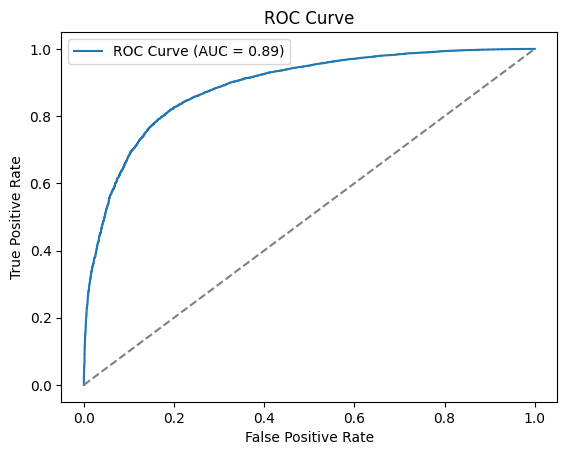

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [15]:
# Split: train 60%, val 20%, test 20%
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2


In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)



# Training accuracy
train_acc = accuracy_score(y_train, model.predict(X_train))

# Validation accuracy
val_acc = accuracy_score(y_val, model.predict(X_val))

# Test accuracy
test_acc = accuracy_score(y_test, model.predict(X_test))

print(f"Training Accuracy:   {train_acc:.3f}")
print(f"Validation Accuracy: {val_acc:.3f}")
print(f"Test Accuracy:       {test_acc:.3f}")



Training Accuracy:   0.877
Validation Accuracy: 0.874
Test Accuracy:       0.878


In [21]:

importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

from sklearn.linear_model import LogisticRegressionCV

model_cv = LogisticRegressionCV(Cs=10, cv=5, max_iter=1000)
model_cv.fit(X_train, y_train)



y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print("Best C value:", model_cv.C_[0])


print(importance.head(10))


[[ 3070  2246]
 [ 1350 22830]]
              precision    recall  f1-score   support

           0       0.69      0.58      0.63      5316
           1       0.91      0.94      0.93     24180

    accuracy                           0.88     29496
   macro avg       0.80      0.76      0.78     29496
weighted avg       0.87      0.88      0.87     29496

Best C value: 0.005994842503189409
                      Feature  Coefficient
6   apparent_temperature_mean     1.433487
8         precipitation_hours     1.379771
3         temperature_2m_mean    -0.824904
10          windgusts_10m_max     0.500440
15                  elevation     0.398228
9           windspeed_10m_max    -0.285675
0                 weathercode     0.270996
7     shortwave_radiation_sum    -0.248210
5    apparent_temperature_min     0.193503
4    apparent_temperature_max    -0.189083


In [22]:
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values('time')

df['rain_tomorrow'] = df['rain_sum'].shift(-1) > 0  # shift up by 1
df['rain_tomorrow'] = df['rain_tomorrow'].astype(int)  # 1 = rain, 0 = no rain

df['rain_yesterday'] = df['rain_sum'].shift(1) > 0  # shift down by 1
df['rain_yesterday'] = df['rain_yesterday'].astype(int)

df = df.dropna()

features = [
    'weathercode', 'temperature_2m_mean', 'apparent_temperature_mean',
    'shortwave_radiation_sum', 'precipitation_hours', 'windspeed_10m_max',
    'windgusts_10m_max', 'elevation', 'rain_yesterday'
]

X = df[features]
y = df['rain_tomorrow']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy: 0.897
Confusion Matrix:
 [[ 1815  2269]
 [  770 24642]]


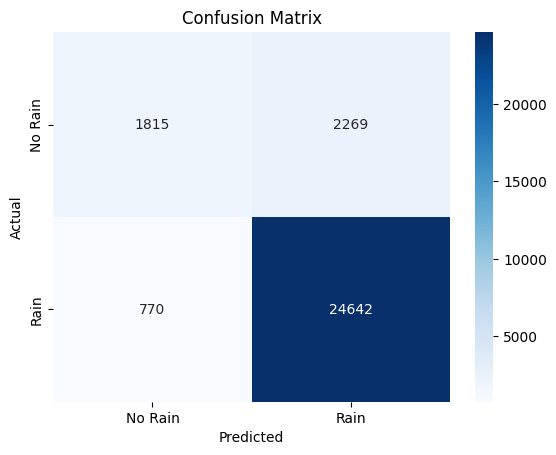

              precision    recall  f1-score   support

     No Rain       0.70      0.44      0.54      4084
        Rain       0.92      0.97      0.94     25412

    accuracy                           0.90     29496
   macro avg       0.81      0.71      0.74     29496
weighted avg       0.89      0.90      0.89     29496

ROC AUC: 0.841


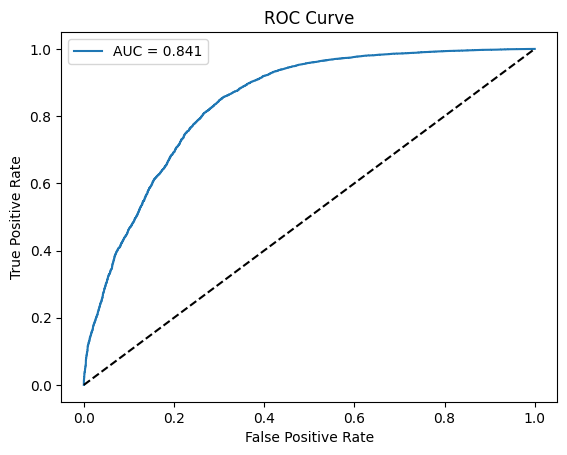

Training Accuracy: 0.869
Test Accuracy: 0.897


In [23]:
# Predict labels
y_pred = model.predict(X_test)

# Predict probabilities (for AUC or threshold tuning)
y_proba = model.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 3))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["No Rain", "Rain"]))

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_proba)
print("ROC AUC:", round(auc, 3))

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Training Accuracy:", round(train_accuracy, 3))
print("Test Accuracy:", round(test_accuracy, 3))


In [26]:
from joblib import dump

# Save the trained model
dump(model, 'weather_prediction_model.joblib')
dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [ ]:
import pandas as pd
import numpy as np
from joblib import load

# Load the saved model and scaler
model = load('weather_prediction_model.joblib')
scaler = load('scaler.joblib')  # Load the scaler used during training

# Define the features used during training
features = [
    'weathercode',
    'temperature_2m_max',
    'temperature_2m_min',
    'temperature_2m_mean',
    'apparent_temperature_max',
    'apparent_temperature_min',
    'apparent_temperature_mean',
    'shortwave_radiation_sum',
    'precipitation_hours'
]

# Create a sample dataset with the correct features
sample_data = pd.DataFrame({
    'weathercode': [2, 3],
    'temperature_2m_max': [30.5, 28.0],
    'temperature_2m_min': [24.0, 22.5],
    'temperature_2m_mean': [27.0, 25.2],
    'apparent_temperature_max': [32.0, 29.5],
    'apparent_temperature_min': [25.0, 23.0],
    'apparent_temperature_mean': [28.5, 26.0],
    'shortwave_radiation_sum': [20.0, 18.5],
    'precipitation_hours': [2, 0]
})

# Scale the sample dataset using the loaded scaler
sample_data_scaled = scaler.transform(sample_data)  # Use the same scaler as training

# Make predictions
predictions = model.predict(sample_data_scaled)
probabilities = model.predict_proba(sample_data_scaled)

# Display results
for i, pred in enumerate(predictions):
    print(f"Sample {i+1}: Prediction = {'Rain' if pred == 1 else 'No Rain'}, Probability = {probabilities[i][1]:.2f}")

Sample 1: Prediction = Rain, Probability = 0.76
Sample 2: Prediction = No Rain, Probability = 0.20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
